# Step 1: Load Datasets
#### First, we'll load the datasets into pandas DataFrames.

In [2]:
import pandas as pd

# Load datasets
batting_df = pd.read_csv('batting_stats_for_icc_mens_t20_world_cup_2024.csv')
bowling_df = pd.read_csv('bowling_stats_for_icc_mens_t20_world_cup_2024.csv')
fielding_df = pd.read_csv('fielding_stats_for_icc_mens_t20_world_cup_2024.csv')
match_results_df = pd.read_csv('match_results_for_icc_mens_t20_world_cup_2024.csv')
wk_df = pd.read_csv('wk_stats_for_icc_mens_t20_world_cup_2024.csv')

# Display the first few rows of each dataset
print("Batting Stats:")
print(batting_df.head())
print("\nBowling Stats:")
print(bowling_df.head())
print("\nFielding Stats:")
print(fielding_df.head())
print("\nMatch Results:")
print(match_results_df.head())
print("\nWicket-Keeping Stats:")
print(wk_df.head())


Batting Stats:
         Player                      Team  Mat  Inns  NO  Runs   HS   Ave  \
0    NP Kenjige  United States of America    4     2   0     1    1   0.5   
1   Aaron Jones  United States of America    6     6   2   162  94*  40.5   
2  Aasif Sheikh                     Nepal    3     3   0    63   42  21.0   
3  Abbas Afridi                  Pakistan    1     1   0    17   17  17.0   
4     F Achelam                    Uganda    1     1   0     9    9   9.0   

       SR  100  50  0  
0   25.00    0   0  1  
1  135.00    0   1  1  
2   88.73    0   0  0  
3   80.95    0   0  0  
4   69.23    0   0  0  

Bowling Stats:
         Player                      Team  Mat  Inns  Balls  Mdns  Runs  Wkts  \
0    NP Kenjige  United States of America    4     4     60     0    89     3   
1  Abbas Afridi                  Pakistan    1     1     18     0    31     0   
2      MR Adair                   Ireland    3     3     72     0    74     3   
3       AC Agar                 Austra

# Step 2: Data Cleaning
#### Next, we'll handle missing values by filling them with 0, assuming missing values mean no performance recorded.

In [3]:
# Handle missing values by filling with 0
batting_df.fillna(0, inplace=True)
bowling_df.fillna(0, inplace=True)
fielding_df.fillna(0, inplace=True)
wk_df.fillna(0, inplace=True)

# Verify there are no missing values
print("Missing values in Batting Stats:", batting_df.isnull().sum().sum())
print("Missing values in Bowling Stats:", bowling_df.isnull().sum().sum())
print("Missing values in Fielding Stats:", fielding_df.isnull().sum().sum())
print("Missing values in Wicket-Keeping Stats:", wk_df.isnull().sum().sum())


Missing values in Batting Stats: 0
Missing values in Bowling Stats: 0
Missing values in Fielding Stats: 0
Missing values in Wicket-Keeping Stats: 0


# Step 3: Feature Engineering
#### Calculate the average strike rate per match for each team.

In [4]:
# Calculate average strike rate per match for each team
team_batting_sr = batting_df.groupby('Team')['SR'].mean().reset_index()
team_batting_sr.columns = ['Team', 'Average_SR']

# Display the first few rows of the result
print("Average Strike Rate per Team:")
print(team_batting_sr.head())


Average Strike Rate per Team:
          Team  Average_SR
0  Afghanistan   89.521538
1    Australia  113.418333
2   Bangladesh   94.216154
3       Canada   93.039000
4      England  120.620000


# Step 4: Merge with Match Results
#### Merge the calculated strike rate with match results to get winning teams' average strike rates.


In [5]:
# Merge with match results to get winning teams
match_results_df = match_results_df.merge(team_batting_sr, left_on='Winner', right_on='Team', how='left')
match_results_df.rename(columns={'Average_SR': 'Winner_Average_SR'}, inplace=True)
match_results_df.drop(columns=['Team'], inplace=True)

# Display the first few rows of the merged result
print("Match Results with Winner's Average SR:")
print(match_results_df.head())


Match Results with Winner's Average SR:
                     Team 1            Team 2                    Winner  \
0  United States of America            Canada  United States of America   
1               West Indies  Papua New Guinea               West Indies   
2                   Namibia              Oman                      tied   
3              South Africa         Sri Lanka              South Africa   
4               Afghanistan            Uganda               Afghanistan   

      Margin      Ground Match Date  Winner_Average_SR  
0  7 wickets      Dallas   6/1/2024          92.614286  
1  5 wickets  Providence   6/2/2024         124.043846  
2          -  Bridgetown   6/2/2024                NaN  
3  6 wickets    New York   6/3/2024         103.885000  
4   125 runs  Providence   6/3/2024          89.521538  


# Step 5: Exploratory Data Analysis (EDA)
#### Visualize the average strike rate of winning teams.

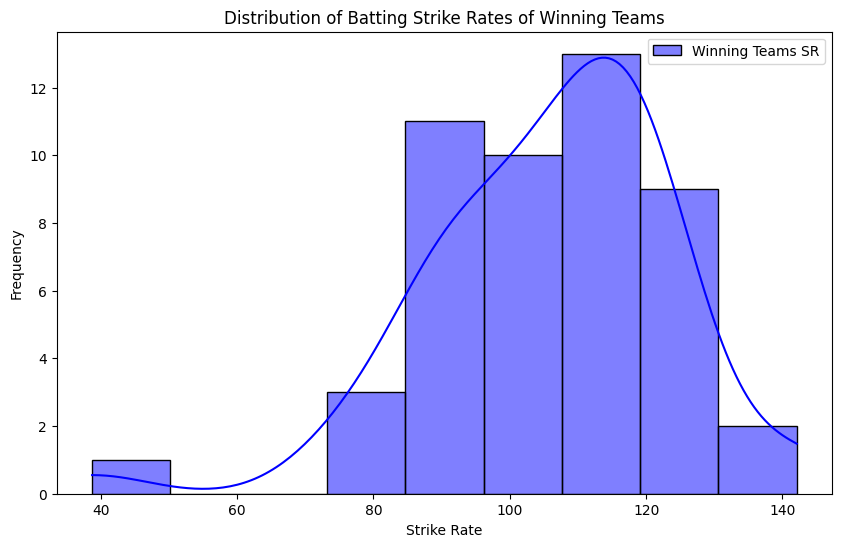

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extract the winner's average strike rate
winning_sr = match_results_df['Winner_Average_SR'].dropna()

# Plot the distribution of batting strike rates
plt.figure(figsize=(10, 6))
sns.histplot(winning_sr, kde=True, color='blue', label='Winning Teams SR')
plt.title('Distribution of Batting Strike Rates of Winning Teams')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Step 6: Hypothesis Testing
#### Compare the average strike rate of winning teams to a sample population (all teams' average SR) using a t-test.

In [7]:
from scipy.stats import ttest_ind

# Use all teams' average SR as sample population
sample_sr = team_batting_sr['Average_SR']

# Perform a t-test
t_stat, p_value = ttest_ind(winning_sr, sample_sr, equal_var=False)

# Results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Teams with a higher batting strike rate are more likely to win matches.")
else:
    print("Fail to reject the null hypothesis: Batting strike rate does not significantly affect match outcomes.")


T-statistic: 2.404257821421575
P-value: 0.0231494700768416
Reject the null hypothesis: Teams with a higher batting strike rate are more likely to win matches.


# Step 7: Visualization
#### Visualize the comparison between the strike rates of winning teams and all teams.

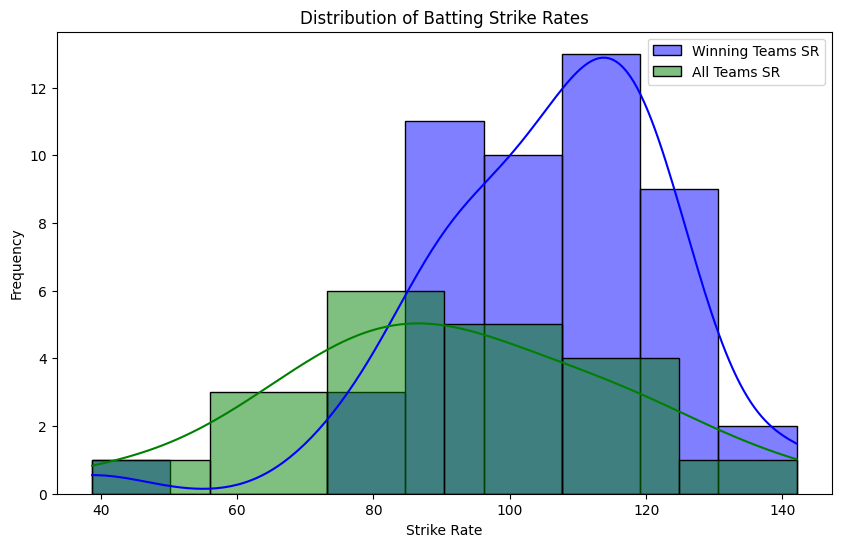

In [8]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(winning_sr, kde=True, color='blue', label='Winning Teams SR')
sns.histplot(sample_sr, kde=True, color='green', label='All Teams SR')
plt.title('Distribution of Batting Strike Rates')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
